Laplacian算子是二阶导数，具有旋转不变性，可以检测不同方向的边缘

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def getTransferFun(kernel, r):  # 计算滤波器核的传递函数
    hPad, wPad = r-kernel.shape[0]//2, r-kernel.shape[1]//2
    kernPadded = cv.copyMakeBorder(kernel, hPad, hPad, wPad, wPad, cv.BORDER_CONSTANT)
    kernFFT = np.fft.fft2(kernPadded)
    fftShift = np.fft.fftshift(kernFFT)
    kernTrans = np.log(1 + np.abs(fftShift))
    transNorm = np.uint8(cv.normalize(kernTrans, None, 0, 255, cv.NORM_MINMAX))
    return transNorm

In [3]:
radius = 64

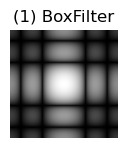

In [4]:
# (1) 盒式滤波器
plt.subplot(241), plt.axis('off'), plt.title("(1) BoxFilter")
kernBox = np.ones((5,5), np.float32)  # BoxF 滤波器核
HBox = getTransferFun(kernBox, radius)  # BoxF 传递函数
plt.imshow(HBox, cmap='gray', vmin=0, vmax=255)

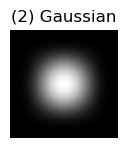

In [5]:
# (2) 高斯低通滤波器
plt.subplot(242), plt.axis('off'), plt.title("(2) Gaussian")
kernX = cv.getGaussianKernel(5, 0)  # 一维高斯核
kernGaussian = kernX * kernX.T  # 二维高斯核
HGaussian = getTransferFun(kernGaussian, radius)  # 高斯低通传递函数
plt.imshow(HGaussian, cmap='gray', vmin=0, vmax=255)

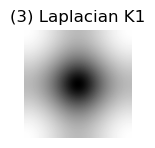

In [6]:
# (3) 拉普拉斯算子 K1
plt.subplot(243), plt.axis('off'), plt.title("(3) Laplacian K1")
kernLaplacian1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # Laplacian K1
hLaplacian1 = getTransferFun(kernLaplacian1, radius)  # Laplacian K1 传递函数
plt.imshow(hLaplacian1, cmap='gray', vmin=0, vmax=255)

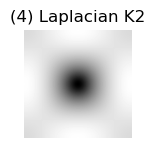

In [7]:
# (4) 拉普拉斯算子 K2
plt.subplot(244), plt.axis('off'), plt.title("(4) Laplacian K2")
kernLaplacian2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])  # Laplacian K2
hLaplacian2 = getTransferFun(kernLaplacian2, radius)  # Laplacian K2 传递函数
plt.imshow(hLaplacian2, cmap='gray', vmin=0, vmax=255)

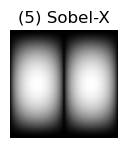

In [8]:
# (5) Sobel 算子，X轴方向
plt.subplot(245), plt.axis('off'), plt.title("(5) Sobel-X")
kernSobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
HSobelX = getTransferFun(kernSobelX, radius)  # Sobel-X 传递函数
plt.imshow(HSobelX, cmap='gray', vmin=0, vmax=255)

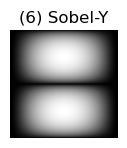

In [9]:
# (6) Sobel 算子，Y轴方向
plt.subplot(246), plt.axis('off'), plt.title("(6) Sobel-Y")
kernSobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
HSobelY = getTransferFun(kernSobelY, radius)  # Sobel-Y 传递函数
plt.imshow(HSobelY, cmap='gray', vmin=0, vmax=255)

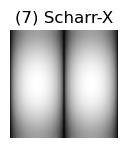

In [10]:
# (7) Scharr 算子，X轴方向
plt.subplot(247), plt.axis('off'), plt.title("(7) Scharr-X")
kernScharrX = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
HScharrX = getTransferFun(kernScharrX, radius)  # Scharr-X 传递函数
plt.imshow(HScharrX, cmap='gray', vmin=0, vmax=255)

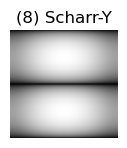

In [11]:
# (8) Scharr 算子，Y轴方向
plt.subplot(248), plt.axis('off'), plt.title("(8) Scharr-Y")
kernScharrY = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])
HScharrY = getTransferFun(kernScharrY, radius)  # Scharr-X 传递函数
plt.imshow(HScharrY, cmap='gray', vmin=0, vmax=255)